<a href="https://colab.research.google.com/github/abdallahgamal5500/House-Price-Prediction/blob/main/neolen_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Part 1 - Data Preprocessing

### Importing the dataset

In [33]:
dataset = pd.read_csv('data.csv')

In [34]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1259 non-null   int64  
 1   MSSubClass     1259 non-null   int64  
 2   MSZoning       1259 non-null   object 
 3   LotFrontage    1041 non-null   float64
 4   LotArea        1259 non-null   int64  
 5   Street         1259 non-null   object 
 6   Alley          76 non-null     object 
 7   LotShape       1259 non-null   object 
 8   LandContour    1259 non-null   object 
 9   Utilities      1259 non-null   object 
 10  LotConfig      1259 non-null   object 
 11  LandSlope      1259 non-null   object 
 12  Neighborhood   1259 non-null   object 
 13  Condition1     1259 non-null   object 
 14  Condition2     1259 non-null   object 
 15  BldgType       1259 non-null   object 
 16  HouseStyle     1259 non-null   object 
 17  OverallQual    1259 non-null   int64  
 18  OverallC

In [36]:
def dropMostNullCoulmns(df):
  x = ((df.isna().sum()/1259)*100) > 40
  result = list()
  for i in x.keys():
      if (x[i]==True):
        result.append(i)
  return df.drop(columns=result)

In [37]:
dataset = dropMostNullCoulmns(dataset)

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1259 non-null   int64  
 1   MSSubClass     1259 non-null   int64  
 2   MSZoning       1259 non-null   object 
 3   LotFrontage    1041 non-null   float64
 4   LotArea        1259 non-null   int64  
 5   Street         1259 non-null   object 
 6   LotShape       1259 non-null   object 
 7   LandContour    1259 non-null   object 
 8   Utilities      1259 non-null   object 
 9   LotConfig      1259 non-null   object 
 10  LandSlope      1259 non-null   object 
 11  Neighborhood   1259 non-null   object 
 12  Condition1     1259 non-null   object 
 13  Condition2     1259 non-null   object 
 14  BldgType       1259 non-null   object 
 15  HouseStyle     1259 non-null   object 
 16  OverallQual    1259 non-null   int64  
 17  OverallCond    1259 non-null   int64  
 18  YearBuil

In [39]:
dataset = dataset.drop(columns=['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'])
dataset = dataset.drop(columns=['MasVnrArea','BsmtFinSF1','2ndFlrSF','WoodDeckSF','OpenPorchSF'])
dataset = dataset.drop(columns=['YrSold','GarageYrBlt','YearRemodAdd','YearBuilt'])

In [40]:
numerical_data = dataset.select_dtypes(exclude=["object_"])
categorical_data = dataset.select_dtypes(include=['object'])
num_cols = dataset.select_dtypes(exclude=["object_"]).columns
cat_cols = dataset.select_dtypes(include=['object']).columns

In [41]:
numerical_data.to_csv('numerical_data.csv',index = False)
categorical_data.to_csv('categorical_data.csv',index = False)

In [42]:
def replaceColumnZeros(df,colsName):
  for col in colsName:
    x = df[np.logical_and(df[col]!=0,df[col]!=np.nan)][col]
    x = x.sum()/x.count()
    df[col] = df.replace(0, x)[col]

In [43]:
replaceColumnZeros(dataset,num_cols)

In [44]:
dataset['LotFrontage'] = dataset.fillna(dataset['LotFrontage'].mean())['LotFrontage']

In [45]:
dataset[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1259 non-null   int64  
 1   MSSubClass    1259 non-null   int64  
 2   LotFrontage   1259 non-null   float64
 3   LotArea       1259 non-null   int64  
 4   OverallQual   1259 non-null   int64  
 5   OverallCond   1259 non-null   int64  
 6   BsmtUnfSF     1259 non-null   float64
 7   TotalBsmtSF   1259 non-null   float64
 8   1stFlrSF      1259 non-null   int64  
 9   GrLivArea     1259 non-null   int64  
 10  BsmtFullBath  1259 non-null   float64
 11  BsmtHalfBath  1259 non-null   float64
 12  FullBath      1259 non-null   float64
 13  HalfBath      1259 non-null   float64
 14  BedroomAbvGr  1259 non-null   float64
 15  KitchenAbvGr  1259 non-null   float64
 16  TotRmsAbvGrd  1259 non-null   int64  
 17  Fireplaces    1259 non-null   float64
 18  GarageCars    1259 non-null 

In [46]:
dataset[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1259 non-null   object
 1   Street         1259 non-null   object
 2   LotShape       1259 non-null   object
 3   LandContour    1259 non-null   object
 4   Utilities      1259 non-null   object
 5   LotConfig      1259 non-null   object
 6   LandSlope      1259 non-null   object
 7   Neighborhood   1259 non-null   object
 8   Condition1     1259 non-null   object
 9   Condition2     1259 non-null   object
 10  BldgType       1259 non-null   object
 11  HouseStyle     1259 non-null   object
 12  RoofStyle      1259 non-null   object
 13  RoofMatl       1259 non-null   object
 14  Exterior1st    1259 non-null   object
 15  Exterior2nd    1259 non-null   object
 16  MasVnrType     1252 non-null   object
 17  ExterQual      1259 non-null   object
 18  ExterCond      1259 non-null

In [47]:
dataset = dataset.dropna()

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1151 entries, 0 to 1258
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1151 non-null   int64  
 1   MSSubClass     1151 non-null   int64  
 2   MSZoning       1151 non-null   object 
 3   LotFrontage    1151 non-null   float64
 4   LotArea        1151 non-null   int64  
 5   Street         1151 non-null   object 
 6   LotShape       1151 non-null   object 
 7   LandContour    1151 non-null   object 
 8   Utilities      1151 non-null   object 
 9   LotConfig      1151 non-null   object 
 10  LandSlope      1151 non-null   object 
 11  Neighborhood   1151 non-null   object 
 12  Condition1     1151 non-null   object 
 13  Condition2     1151 non-null   object 
 14  BldgType       1151 non-null   object 
 15  HouseStyle     1151 non-null   object 
 16  OverallQual    1151 non-null   int64  
 17  OverallCond    1151 non-null   int64  
 18  RoofStyl

In [49]:
def encodeCatColumns(df,colsName):
  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()
  result1 = np.empty((df.shape[0], 0), int)
  for i in colsName:
    if len(df[i].unique()) <= 2:
      result1 = np.concatenate((result1,np.reshape(le.fit_transform(df[i]), (df.shape[0],1))),axis=1)
    else:
      result1 = np.concatenate((result1,np.array(pd.get_dummies(df[i]))),axis=1)
  return result1

In [50]:
result = encodeCatColumns(dataset,cat_cols)
x = np.array(dataset[num_cols].iloc[:,1:-1])
x = np.concatenate((x,result),axis=1)
y = dataset[num_cols].iloc[:,-1]

In [51]:
print(x.shape)

(1151, 242)


## Part 2 - Split dataset

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 0)

## Part 3 - Feature scaling 

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Part 4 - Build && Train Model XGBoost

In [54]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(x_train, y_train)

[01:06:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

## Part 5 - Predict

In [55]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((np.array(y_pred).reshape(len(y_pred),1), np.array(y_test).reshape(len(y_test),1)),1))

[[183047.59 190000.  ]
 [418414.91 555000.  ]
 [145503.03 157000.  ]
 [192203.78 185000.  ]
 [125131.86 127500.  ]
 [149284.66 143000.  ]
 [228392.98 237000.  ]
 [130194.44  95000.  ]
 [333457.34 320000.  ]
 [234480.03 254900.  ]
 [162850.7  165000.  ]
 [181479.81 163900.  ]
 [177509.47 180000.  ]
 [202224.39 197900.  ]
 [186943.   206000.  ]
 [464630.44 485000.  ]
 [230996.08 239000.  ]
 [338655.81 319000.  ]
 [218971.23 230000.  ]
 [198878.56 189000.  ]
 [170813.84 180500.  ]
 [280367.94 264132.  ]
 [225282.72 222000.  ]
 [193859.08 167000.  ]
 [197016.41 234000.  ]
 [213962.81 187500.  ]
 [143552.44 143900.  ]
 [248942.19 272000.  ]
 [146177.77 129900.  ]
 [132464.39 130000.  ]
 [142100.23 150000.  ]
 [286412.62 255500.  ]
 [134645.73 131400.  ]
 [220018.8  201000.  ]
 [236677.14 235128.  ]
 [168586.3  140000.  ]
 [134724.2  152000.  ]
 [176856.16 155000.  ]
 [140176.03 131500.  ]
 [129125.25 132000.  ]
 [170984.33 160200.  ]
 [148401.7  146000.  ]
 [241055.28 257500.  ]
 [197975.22

In [56]:
for i in range(len(y_pred)):
  print("pred: {:.2f} ".format(float(y_pred[i])),end = "")
  print("real: {:.2f}".format(np.array(y_test)[i]),end = "")
  print("")

pred: 183047.59 real: 190000.00
pred: 418414.91 real: 555000.00
pred: 145503.03 real: 157000.00
pred: 192203.78 real: 185000.00
pred: 125131.86 real: 127500.00
pred: 149284.66 real: 143000.00
pred: 228392.98 real: 237000.00
pred: 130194.44 real: 95000.00
pred: 333457.34 real: 320000.00
pred: 234480.03 real: 254900.00
pred: 162850.70 real: 165000.00
pred: 181479.81 real: 163900.00
pred: 177509.47 real: 180000.00
pred: 202224.39 real: 197900.00
pred: 186943.00 real: 206000.00
pred: 464630.44 real: 485000.00
pred: 230996.08 real: 239000.00
pred: 338655.81 real: 319000.00
pred: 218971.23 real: 230000.00
pred: 198878.56 real: 189000.00
pred: 170813.84 real: 180500.00
pred: 280367.94 real: 264132.00
pred: 225282.72 real: 222000.00
pred: 193859.08 real: 167000.00
pred: 197016.41 real: 234000.00
pred: 213962.81 real: 187500.00
pred: 143552.44 real: 143900.00
pred: 248942.19 real: 272000.00
pred: 146177.77 real: 129900.00
pred: 132464.39 real: 130000.00
pred: 142100.23 real: 150000.00
pred: 286

## Part 5 - Evaluate the model

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9154589156788818

## Part 6 - Visualize Y-Predicted vs Y-Test

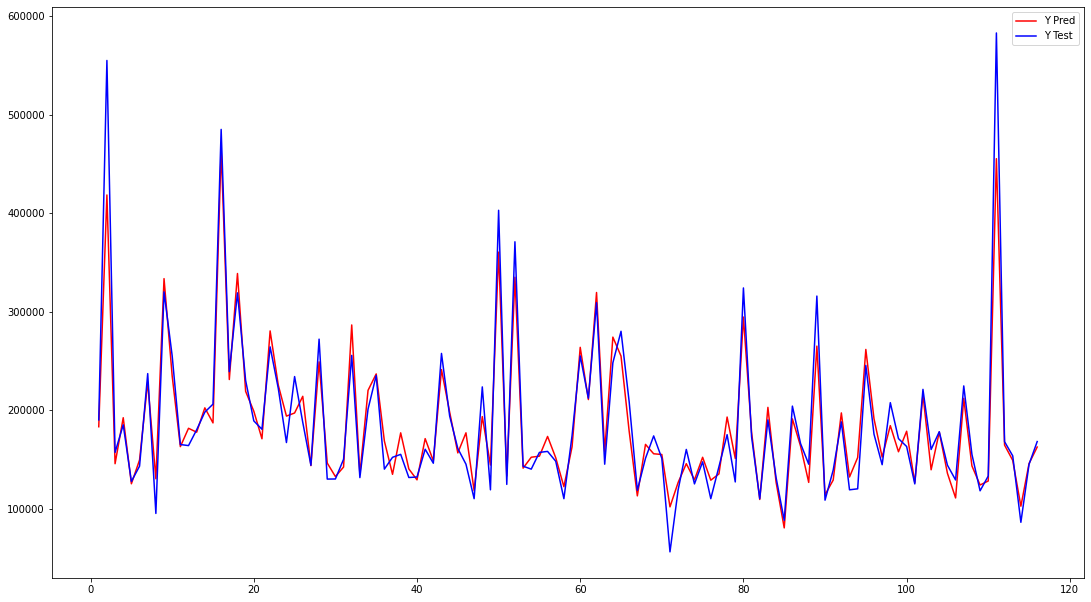

In [58]:
fig = plt.gcf()
x = np.arange(1,len(y_pred)+1)
plt.plot(x,y_pred, color = 'r', label='Y Pred')
plt.plot(x,y_test, color = 'b', label='Y Test')
fig.set_size_inches(18.5, 10.5)
plt.legend()
plt.show()